In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy import stats


# Load the data
df = pd.read_csv("../data/weather/weather_new york city 2020-01-01 to 2023-03-31.csv")

# Inspect the data
print(df.head())

            name             datetime  temp  feelslike   dew  humidity  \
0  new york city  2020-01-01T00:00:00  41.0       33.6  30.6     66.29   
1  new york city  2020-01-01T01:00:00  39.8       32.9  28.8     64.50   
2  new york city  2020-01-01T02:00:00  39.8       32.8  29.7     66.99   
3  new york city  2020-01-01T03:00:00  38.9       30.8  28.8     66.76   
4  new york city  2020-01-01T04:00:00  38.9       33.7  26.8     61.35   

   precip  precipprob preciptype  snow  ...  sealevelpressure  cloudcover  \
0     0.0           0        NaN   0.0  ...            1004.3        99.8   
1     0.0           0        NaN   0.0  ...            1004.3        33.6   
2     0.0           0        NaN   0.0  ...            1004.7        87.9   
3     0.0           0        NaN   0.0  ...            1005.1        29.3   
4     0.0           0        NaN   0.0  ...            1005.5        99.8   

   visibility  solarradiation  solarenergy  uvindex  severerisk  \
0         9.9            

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28463 entries, 0 to 28462
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              28463 non-null  object 
 1   datetime          28463 non-null  object 
 2   temp              28463 non-null  float64
 3   feelslike         28463 non-null  float64
 4   dew               28463 non-null  float64
 5   humidity          28463 non-null  float64
 6   precip            28463 non-null  float64
 7   precipprob        28463 non-null  int64  
 8   preciptype        3620 non-null   object 
 9   snow              28463 non-null  float64
 10  snowdepth         28463 non-null  float64
 11  windgust          15908 non-null  float64
 12  windspeed         28463 non-null  float64
 13  winddir           28463 non-null  float64
 14  sealevelpressure  28463 non-null  float64
 15  cloudcover        28463 non-null  float64
 16  visibility        28463 non-null  float6

In [3]:
df['stations'].value_counts()

72505394728,72055399999,KLGA,KJRB,F1417,KNYC,72503014732    11227
72505394728,72055399999,KLGA,KJRB,KNYC,72503014732           8979
72505394728,KLGA,KNYC,72503014732                            3493
72505394728,KLGA,F1417,KNYC,72503014732                      3115
72505394728,KLGA,F8726,KNYC,72503014732                       350
72505394728,72055399999,KLGA,KJRB,F8726,KNYC,72503014732      299
D9152,72505394728,KLGA,KNYC,72503014732                       118
72505394728,72055399999,KLGA,KJRB,F1417,KNYC                  118
72505394728,KLGA,KJRB,F1417,KNYC,72503014732                  115
72505394728,72055399999,KLGA,KJRB,KNYC                         88
72505394728,72055399999,KLGA,KJRB,F1417,72503014732            86
72505394728,KLGA,KJRB,KNYC,72503014732                         86
72505394728,72055399999,KLGA,KJRB,72503014732                  65
725,053,947,287,205,000,000,000,000,000,000                    41
KLGA,KJRB,F1417,KNYC                                           38
7250539472

In [4]:
df['datetime'].value_counts()

2022-11-06T01:00:00    2
2020-11-01T01:00:00    2
2021-11-07T01:00:00    2
2022-03-01T10:00:00    1
2022-03-01T21:00:00    1
                      ..
2021-01-30T05:00:00    1
2021-01-30T04:00:00    1
2021-01-30T03:00:00    1
2021-01-30T02:00:00    1
2023-03-31T23:00:00    1
Name: datetime, Length: 28460, dtype: int64

In [5]:
df['datetime']= pd.to_datetime(df['datetime'])
df['date']= df['datetime'].dt.date
df

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations,date
0,new york city,2020-01-01 00:00:00,41.0,33.6,30.6,66.29,0.0,0,NaN,0.0,...,99.8,9.9,0.0,NaN,0,NaN,Overcast,cloudy,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301...",2020-01-01
1,new york city,2020-01-01 01:00:00,39.8,32.9,28.8,64.50,0.0,0,NaN,0.0,...,33.6,9.9,0.0,NaN,0,NaN,Partially cloudy,partly-cloudy-night,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301...",2020-01-01
2,new york city,2020-01-01 02:00:00,39.8,32.8,29.7,66.99,0.0,0,NaN,0.0,...,87.9,9.9,0.0,NaN,0,NaN,Partially cloudy,partly-cloudy-night,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301...",2020-01-01
3,new york city,2020-01-01 03:00:00,38.9,30.8,28.8,66.76,0.0,0,NaN,0.0,...,29.3,9.9,0.0,NaN,0,NaN,Partially cloudy,partly-cloudy-night,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301...",2020-01-01
4,new york city,2020-01-01 04:00:00,38.9,33.7,26.8,61.35,0.0,0,NaN,0.0,...,99.8,9.9,0.0,NaN,0,NaN,Overcast,cloudy,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301...",2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28458,new york city,2023-03-31 19:00:00,51.1,51.1,40.7,67.56,0.0,0,NaN,0.0,...,99.8,9.9,7.0,0.0,0,10.0,Overcast,cloudy,"KLGA,KJRB,F1417,KNYC",2023-03-31
28459,new york city,2023-03-31 20:00:00,48.9,46.7,40.8,73.40,0.0,0,NaN,0.0,...,100.0,9.9,2.0,0.0,0,10.0,Overcast,cloudy,"KLGA,KJRB,F8726,KNYC",2023-03-31
28460,new york city,2023-03-31 21:00:00,51.2,51.2,43.0,73.52,0.0,0,NaN,0.0,...,99.8,9.9,0.0,NaN,0,10.0,Overcast,cloudy,"KLGA,KJRB,KNYC",2023-03-31
28461,new york city,2023-03-31 22:00:00,53.9,53.9,45.0,71.67,0.0,0,NaN,0.0,...,100.0,9.9,0.0,NaN,0,10.0,Overcast,cloudy,"KLGA,KJRB,KNYC",2023-03-31


In [6]:
df[df['datetime']=='2022-11-06T01:00:00']

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations,date
24960,new york city,2022-11-06 01:00:00,65.7,65.7,60.8,84.32,0.0,0,NaN,0.0,...,88.8,9.9,0.0,NaN,0,10.0,Partially cloudy,partly-cloudy-night,"72505394728,KLGA,KNYC,72503014732",2022-11-06
24961,new york city,2022-11-06 01:00:00,66.0,66.0,61.0,83.91,0.0,0,NaN,0.0,...,60.4,9.9,0.0,NaN,0,10.0,Partially cloudy,partly-cloudy-night,"72505394728,KLGA,KNYC,72503014732",2022-11-06


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28463 entries, 0 to 28462
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              28463 non-null  object        
 1   datetime          28463 non-null  datetime64[ns]
 2   temp              28463 non-null  float64       
 3   feelslike         28463 non-null  float64       
 4   dew               28463 non-null  float64       
 5   humidity          28463 non-null  float64       
 6   precip            28463 non-null  float64       
 7   precipprob        28463 non-null  int64         
 8   preciptype        3620 non-null   object        
 9   snow              28463 non-null  float64       
 10  snowdepth         28463 non-null  float64       
 11  windgust          15908 non-null  float64       
 12  windspeed         28463 non-null  float64       
 13  winddir           28463 non-null  float64       
 14  sealevelpressure  2846

In [8]:
df.isna().sum()

name                    0
datetime                0
temp                    0
feelslike               0
dew                     0
humidity                0
precip                  0
precipprob              0
preciptype          24843
snow                    0
snowdepth               0
windgust            12555
windspeed               0
winddir                 0
sealevelpressure        0
cloudcover              0
visibility              0
solarradiation          0
solarenergy         12192
uvindex                 0
severerisk          17767
conditions              0
icon                    0
stations                0
date                    0
dtype: int64

In [9]:
df['preciptype'].value_counts()

rain                3221
snow                 229
rain,snow            138
freezingrain          19
ice                   10
freezingrain,ice       2
rain,ice               1
Name: preciptype, dtype: int64

In [10]:
df['precipprob'].describe()

count    28463.000000
mean         9.468433
std         29.278357
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        100.000000
Name: precipprob, dtype: float64

In [11]:
df['precip'].describe()

count    28463.000000
mean         0.002626
std          0.021788
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.445000
Name: precip, dtype: float64

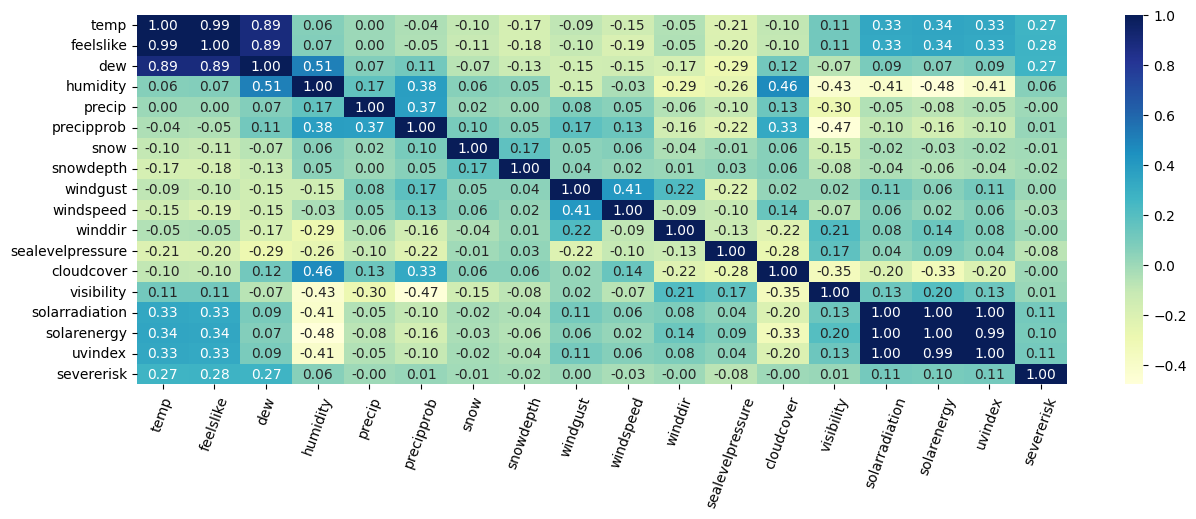

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure().set_figwidth(15)

hm= sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, fmt='.2f')
hm.set_xticklabels(hm.get_xticklabels(), rotation=70)
plt.show()

In [9]:
df.columns

Index(['name', 'datetime', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
       'precipprob', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'conditions',
       'icon', 'stations', 'date'],
      dtype='object')

In [14]:
df.drop(columns=['icon', 'feelslike', 'dew', 'sealevelpressure', 'solarenergy','severerisk', 'windgust'], inplace=True)
df

,name,datetime,temp,humidity,precip,precipprob,preciptype,snow,snowdepth,windspeed,winddir,cloudcover,visibility,solarradiation,uvindex,conditions,stations,date
0,new york city,2020-01-01 00:00:00,41.0,66.29,0.0,0,NaN,0.0,0.0,13.7,261.0,99.8,9.9,0.0,0,Overcast,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301...",2020-01-01
1,new york city,2020-01-01 01:00:00,39.8,64.50,0.0,0,NaN,0.0,0.0,11.3,270.0,33.6,9.9,0.0,0,Partially cloudy,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301...",2020-01-01
2,new york city,2020-01-01 02:00:00,39.8,66.99,0.0,0,NaN,0.0,0.0,11.4,261.0,87.9,9.9,0.0,0,Partially cloudy,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301...",2020-01-01
3,new york city,2020-01-01 03:00:00,38.9,66.76,0.0,0,NaN,0.0,0.0,13.9,270.0,29.3,9.9,0.0,0,Partially cloudy,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301...",2020-01-01
4,new york city,2020-01-01 04:00:00,38.9,61.35,0.0,0,NaN,0.0,0.0,7.3,253.0,99.8,9.9,0.0,0,Overcast,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301...",2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28458,new york city,2023-03-31 19:00:00,51.1,67.56,0.0,0,NaN,0.0,0.0,4.5,133.0,99.8,9.9,7.0,0,Overcast,"KLGA,KJRB,F1417,KNYC",2023-03-31
28459,new york city,2023-03-31 20:00:00,48.9,73.40,0.0,0,NaN,0.0,0.0,5.5,31.0,100.0,9.9,2.0,0,Overcast,"KLGA,KJRB,F8726,KNYC",2023-03-31
28460,new york city,2023-03-31 21:00:00,51.2,73.52,0.0,0,NaN,0.0,0.0,5.8,23.0,99.8,9.9,0.0,0,Overcast,"KLGA,KJRB,KNYC",2023-03-31
28461,new york city,2023-03-31 22:00:00,53.9,71.67,0.0,0,NaN,0.0,0.0,6.4,323.0,100.0,9.9,0.0,0,Overcast,"KLGA,KJRB,KNYC",2023-03-31


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28463 entries, 0 to 28462
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            28463 non-null  object        
 1   datetime        28463 non-null  datetime64[ns]
 2   temp            28463 non-null  float64       
 3   humidity        28463 non-null  float64       
 4   precip          28463 non-null  float64       
 5   precipprob      28463 non-null  int64         
 6   preciptype      3620 non-null   object        
 7   snow            28463 non-null  float64       
 8   snowdepth       28463 non-null  float64       
 9   windspeed       28463 non-null  float64       
 10  winddir         28463 non-null  float64       
 11  cloudcover      28463 non-null  float64       
 12  visibility      28463 non-null  float64       
 13  solarradiation  28463 non-null  float64       
 14  uvindex         28463 non-null  int64         
 15  co

In [16]:
df.drop(columns=['stations'], inplace=True)
df

,name,datetime,temp,humidity,precip,precipprob,preciptype,snow,snowdepth,windspeed,winddir,cloudcover,visibility,solarradiation,uvindex,conditions,date
0,new york city,2020-01-01 00:00:00,41.0,66.29,0.0,0,NaN,0.0,0.0,13.7,261.0,99.8,9.9,0.0,0,Overcast,2020-01-01
1,new york city,2020-01-01 01:00:00,39.8,64.50,0.0,0,NaN,0.0,0.0,11.3,270.0,33.6,9.9,0.0,0,Partially cloudy,2020-01-01
2,new york city,2020-01-01 02:00:00,39.8,66.99,0.0,0,NaN,0.0,0.0,11.4,261.0,87.9,9.9,0.0,0,Partially cloudy,2020-01-01
3,new york city,2020-01-01 03:00:00,38.9,66.76,0.0,0,NaN,0.0,0.0,13.9,270.0,29.3,9.9,0.0,0,Partially cloudy,2020-01-01
4,new york city,2020-01-01 04:00:00,38.9,61.35,0.0,0,NaN,0.0,0.0,7.3,253.0,99.8,9.9,0.0,0,Overcast,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28458,new york city,2023-03-31 19:00:00,51.1,67.56,0.0,0,NaN,0.0,0.0,4.5,133.0,99.8,9.9,7.0,0,Overcast,2023-03-31
28459,new york city,2023-03-31 20:00:00,48.9,73.40,0.0,0,NaN,0.0,0.0,5.5,31.0,100.0,9.9,2.0,0,Overcast,2023-03-31
28460,new york city,2023-03-31 21:00:00,51.2,73.52,0.0,0,NaN,0.0,0.0,5.8,23.0,99.8,9.9,0.0,0,Overcast,2023-03-31
28461,new york city,2023-03-31 22:00:00,53.9,71.67,0.0,0,NaN,0.0,0.0,6.4,323.0,100.0,9.9,0.0,0,Overcast,2023-03-31


In [17]:
df.drop(columns=['name'], inplace=True)
df

,datetime,temp,humidity,precip,precipprob,preciptype,snow,snowdepth,windspeed,winddir,cloudcover,visibility,solarradiation,uvindex,conditions,date
0,2020-01-01 00:00:00,41.0,66.29,0.0,0,NaN,0.0,0.0,13.7,261.0,99.8,9.9,0.0,0,Overcast,2020-01-01
1,2020-01-01 01:00:00,39.8,64.50,0.0,0,NaN,0.0,0.0,11.3,270.0,33.6,9.9,0.0,0,Partially cloudy,2020-01-01
2,2020-01-01 02:00:00,39.8,66.99,0.0,0,NaN,0.0,0.0,11.4,261.0,87.9,9.9,0.0,0,Partially cloudy,2020-01-01
3,2020-01-01 03:00:00,38.9,66.76,0.0,0,NaN,0.0,0.0,13.9,270.0,29.3,9.9,0.0,0,Partially cloudy,2020-01-01
4,2020-01-01 04:00:00,38.9,61.35,0.0,0,NaN,0.0,0.0,7.3,253.0,99.8,9.9,0.0,0,Overcast,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28458,2023-03-31 19:00:00,51.1,67.56,0.0,0,NaN,0.0,0.0,4.5,133.0,99.8,9.9,7.0,0,Overcast,2023-03-31
28459,2023-03-31 20:00:00,48.9,73.40,0.0,0,NaN,0.0,0.0,5.5,31.0,100.0,9.9,2.0,0,Overcast,2023-03-31
28460,2023-03-31 21:00:00,51.2,73.52,0.0,0,NaN,0.0,0.0,5.8,23.0,99.8,9.9,0.0,0,Overcast,2023-03-31
28461,2023-03-31 22:00:00,53.9,71.67,0.0,0,NaN,0.0,0.0,6.4,323.0,100.0,9.9,0.0,0,Overcast,2023-03-31


In [18]:
df.drop_duplicates(subset='datetime', inplace=True)
df.reset_index(inplace=True, drop=True)

In [19]:
df[['date', 'conditions']].value_counts().sort_index()

date        conditions      
2020-01-01  Clear                3
            Overcast            11
            Partially cloudy     9
            Rain, Overcast       1
2020-01-02  Clear               19
                                ..
2023-03-30  Partially cloudy     2
            Snow, Overcast       1
2023-03-31  Clear                8
            Overcast            13
            Partially cloudy     3
Length: 3731, dtype: int64

In [20]:
df['conditions'].value_counts()

Clear                                            13160
Overcast                                          6319
Partially cloudy                                  6286
Rain, Overcast                                    1854
Rain, Partially cloudy                             453
Rain                                               153
Snow, Rain, Overcast                               114
Snow, Overcast                                      77
Snow, Rain, Partially cloudy                        12
Freezing Drizzle/Freezing Rain, Overcast            11
Snow, Partially cloudy                               7
Snow, Rain                                           6
Ice, Overcast                                        5
Freezing Drizzle/Freezing Rain, Ice, Overcast        2
Rain, Ice, Overcast                                  1
Name: conditions, dtype: int64

In [21]:
most_common = df.groupby('date')['conditions'].apply(lambda x: x.value_counts().index[0]).to_dict()
df['day_condition'] = df['date'].map(most_common)
df['day_condition'].value_counts()

Clear                     15452
Overcast                   6888
Partially cloudy           4704
Rain, Overcast             1248
Snow, Rain, Overcast         96
Rain, Partially cloudy       48
Snow, Overcast               24
Name: day_condition, dtype: int64

In [18]:
df.columns

Index(['datetime', 'temp', 'snow', 'snowdepth', 'windspeed', 'winddir',
       'cloudcover', 'visibility', 'solarradiation', 'uvindex', 'conditions',
       'date', 'day_condition'],
      dtype='object')

In [22]:
df.describe()

,temp,humidity,precip,precipprob,snow,snowdepth,windspeed,winddir,cloudcover,visibility,solarradiation,uvindex
count,28460.000000,28460.000000,28460.000000,28460.000000,28460.000000,28460.000000,28460.000000,28460.000000,28460.000000,28460.000000,28460.000000,28460.000000
mean,56.436943,62.814982,0.002626,9.469431,0.001616,0.152748,6.688960,195.605524,43.035295,9.407656,155.150330,1.535488
std,16.853536,18.540499,0.021789,29.279738,0.023529,1.133151,4.095529,113.406537,43.655735,1.599594,249.706575,2.513502
min,6.400000,10.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43.000000,48.440000,0.000000,0.000000,0.000000,0.000000,4.300000,61.000000,0.900000,9.900000,0.000000,0.000000
50%,55.400000,62.350000,0.000000,0.000000,0.000000,0.000000,6.000000,240.000000,23.800000,9.900000,11.000000,0.000000
75%,71.000000,78.390000,0.000000,0.000000,0.000000,0.000000,9.000000,279.000000,98.600000,9.900000,220.000000,2.000000
max,97.000000,99.720000,1.445000,100.000000,1.550000,37.280000,31.300000,360.000000,100.000000,9.900000,1178.000000,10.000000


In [23]:
df.drop(columns=['winddir'], inplace=True)

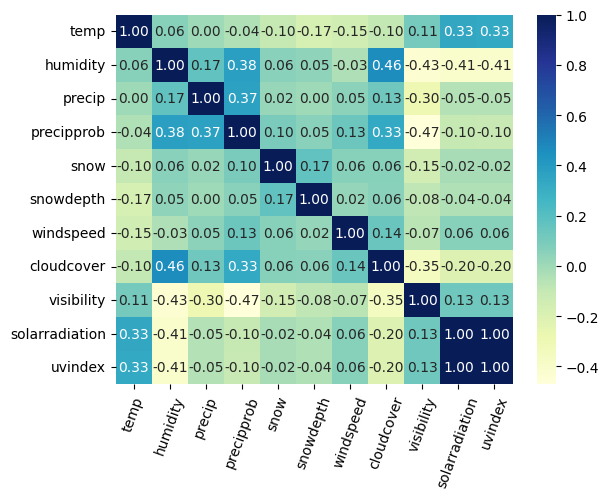

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

hm= sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, fmt='.2f')
hm.set_xticklabels(hm.get_xticklabels(), rotation=70)
plt.show()

In [25]:
df.drop(columns=['solarradiation'], inplace=True)

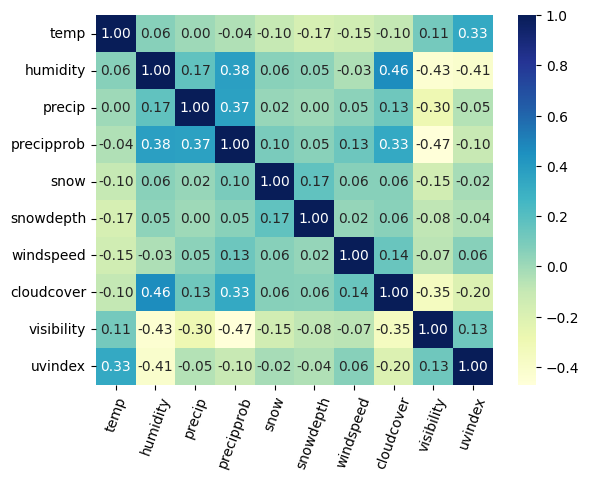

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

hm= sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, fmt='.2f')
hm.set_xticklabels(hm.get_xticklabels(), rotation=70)
plt.show()

In [27]:
df

,datetime,temp,humidity,precip,precipprob,preciptype,snow,snowdepth,windspeed,cloudcover,visibility,uvindex,conditions,date,day_condition
0,2020-01-01 00:00:00,41.0,66.29,0.0,0,NaN,0.0,0.0,13.7,99.8,9.9,0,Overcast,2020-01-01,Overcast
1,2020-01-01 01:00:00,39.8,64.50,0.0,0,NaN,0.0,0.0,11.3,33.6,9.9,0,Partially cloudy,2020-01-01,Overcast
2,2020-01-01 02:00:00,39.8,66.99,0.0,0,NaN,0.0,0.0,11.4,87.9,9.9,0,Partially cloudy,2020-01-01,Overcast
3,2020-01-01 03:00:00,38.9,66.76,0.0,0,NaN,0.0,0.0,13.9,29.3,9.9,0,Partially cloudy,2020-01-01,Overcast
4,2020-01-01 04:00:00,38.9,61.35,0.0,0,NaN,0.0,0.0,7.3,99.8,9.9,0,Overcast,2020-01-01,Overcast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28455,2023-03-31 19:00:00,51.1,67.56,0.0,0,NaN,0.0,0.0,4.5,99.8,9.9,0,Overcast,2023-03-31,Overcast
28456,2023-03-31 20:00:00,48.9,73.40,0.0,0,NaN,0.0,0.0,5.5,100.0,9.9,0,Overcast,2023-03-31,Overcast
28457,2023-03-31 21:00:00,51.2,73.52,0.0,0,NaN,0.0,0.0,5.8,99.8,9.9,0,Overcast,2023-03-31,Overcast
28458,2023-03-31 22:00:00,53.9,71.67,0.0,0,NaN,0.0,0.0,6.4,100.0,9.9,0,Overcast,2023-03-31,Overcast


In [28]:
df.describe()

,temp,humidity,precip,precipprob,snow,snowdepth,windspeed,cloudcover,visibility,uvindex
count,28460.000000,28460.000000,28460.000000,28460.000000,28460.000000,28460.000000,28460.000000,28460.000000,28460.000000,28460.000000
mean,56.436943,62.814982,0.002626,9.469431,0.001616,0.152748,6.688960,43.035295,9.407656,1.535488
std,16.853536,18.540499,0.021789,29.279738,0.023529,1.133151,4.095529,43.655735,1.599594,2.513502
min,6.400000,10.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43.000000,48.440000,0.000000,0.000000,0.000000,0.000000,4.300000,0.900000,9.900000,0.000000
50%,55.400000,62.350000,0.000000,0.000000,0.000000,0.000000,6.000000,23.800000,9.900000,0.000000
75%,71.000000,78.390000,0.000000,0.000000,0.000000,0.000000,9.000000,98.600000,9.900000,2.000000
max,97.000000,99.720000,1.445000,100.000000,1.550000,37.280000,31.300000,100.000000,9.900000,10.000000


In [29]:
df.columns

Index(['datetime', 'temp', 'humidity', 'precip', 'precipprob', 'preciptype',
       'snow', 'snowdepth', 'windspeed', 'cloudcover', 'visibility', 'uvindex',
       'conditions', 'date', 'day_condition'],
      dtype='object')

In [30]:
df.drop(columns=[ 'precip','snow', 'snowdepth'], inplace=True)

In [31]:
df.columns

Index(['datetime', 'temp', 'humidity', 'precipprob', 'preciptype', 'windspeed',
       'cloudcover', 'visibility', 'uvindex', 'conditions', 'date',
       'day_condition'],
      dtype='object')

In [34]:
df['date'] = pd.to_datetime(df['date'])

# group by date and calculate min, max, and mean temperature for each group
temp_summary = df.groupby('date')['temp'].agg(['min', 'max', 'mean']).reset_index()
temp_summary.columns=['date','temp_min', 'temp_max', 'temp_mean']

humidity_summary = df.groupby('date')['humidity'].agg(['min', 'max', 'mean']).reset_index()
humidity_summary.columns=['date','humidity_min', 'humidity_max', 'humidity_mean']

precipprob_summary = df.groupby('date')['precipprob'].agg(['min', 'max', 'mean']).reset_index()
precipprob_summary.columns=['date','precipprob_min', 'precipprob_max', 'precipprob_mean']

windspeed_summary = df.groupby('date')['windspeed'].agg(['min', 'max', 'mean']).reset_index()
windspeed_summary.columns=['date','windspeed_min', 'windspeed_max', 'windspeed_mean']

cloudcover_summary = df.groupby('date')['cloudcover'].agg(['min', 'max', 'mean']).reset_index()
cloudcover_summary.columns=['date','cloudcover_min', 'cloudcover_max', 'cloudcover_mean']

visibility_summary = df.groupby('date')['visibility'].agg(['min', 'max', 'mean']).reset_index()
visibility_summary.columns=['date','visibility_min', 'visibility_max', 'visibility_mean']

uvindex_summary = df.groupby('date')['uvindex'].agg(['min', 'max', 'mean']).reset_index()
uvindex_summary.columns=['date','uvindex_min', 'uvindex_max', 'uvindex_mean']

temp_summary

,date,temp_min,temp_max,temp_mean
0,2020-01-01,35.1,41.0,38.462500
1,2020-01-02,33.2,48.0,40.587500
2,2020-01-03,44.1,47.1,45.737500
3,2020-01-04,44.0,48.9,46.850000
4,2020-01-05,37.1,44.7,40.245833
...,...,...,...,...
1181,2023-03-27,44.9,57.8,50.579167
1182,2023-03-28,43.9,51.9,47.175000
1183,2023-03-29,42.0,55.1,46.695833
1184,2023-03-30,33.0,48.6,41.091667


In [35]:
# merge the temperature summary back to the original DataFrame
df = pd.merge(df, temp_summary, on='date')
df = pd.merge(df, humidity_summary, on='date')
df = pd.merge(df, precipprob_summary, on='date')
df = pd.merge(df, windspeed_summary, on='date')
df = pd.merge(df, cloudcover_summary, on='date')
df = pd.merge(df, visibility_summary, on='date')
df = pd.merge(df, uvindex_summary, on='date')
df

,datetime,temp,humidity,precipprob,preciptype,windspeed,cloudcover,visibility,uvindex,conditions,...,windspeed_mean,cloudcover_min,cloudcover_max,cloudcover_mean,visibility_min,visibility_max,visibility_mean,uvindex_min,uvindex_max,uvindex_mean
0,2020-01-01 00:00:00,41.0,66.29,0,NaN,13.7,99.8,9.9,0,Overcast,...,10.745833,0.0,100.0,69.670833,9.9,9.9,9.900000,0,2,0.416667
1,2020-01-01 01:00:00,39.8,64.50,0,NaN,11.3,33.6,9.9,0,Partially cloudy,...,10.745833,0.0,100.0,69.670833,9.9,9.9,9.900000,0,2,0.416667
2,2020-01-01 02:00:00,39.8,66.99,0,NaN,11.4,87.9,9.9,0,Partially cloudy,...,10.745833,0.0,100.0,69.670833,9.9,9.9,9.900000,0,2,0.416667
3,2020-01-01 03:00:00,38.9,66.76,0,NaN,13.9,29.3,9.9,0,Partially cloudy,...,10.745833,0.0,100.0,69.670833,9.9,9.9,9.900000,0,2,0.416667
4,2020-01-01 04:00:00,38.9,61.35,0,NaN,7.3,99.8,9.9,0,Overcast,...,10.745833,0.0,100.0,69.670833,9.9,9.9,9.900000,0,2,0.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28455,2023-03-31 19:00:00,51.1,67.56,0,NaN,4.5,99.8,9.9,0,Overcast,...,6.387500,1.0,100.0,62.620833,8.8,9.9,9.854167,0,6,1.375000
28456,2023-03-31 20:00:00,48.9,73.40,0,NaN,5.5,100.0,9.9,0,Overcast,...,6.387500,1.0,100.0,62.620833,8.8,9.9,9.854167,0,6,1.375000
28457,2023-03-31 21:00:00,51.2,73.52,0,NaN,5.8,99.8,9.9,0,Overcast,...,6.387500,1.0,100.0,62.620833,8.8,9.9,9.854167,0,6,1.375000
28458,2023-03-31 22:00:00,53.9,71.67,0,NaN,6.4,100.0,9.9,0,Overcast,...,6.387500,1.0,100.0,62.620833,8.8,9.9,9.854167,0,6,1.375000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28460 entries, 0 to 28459
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   datetime         28460 non-null  datetime64[ns]
 1   temp             28460 non-null  float64       
 2   humidity         28460 non-null  float64       
 3   precipprob       28460 non-null  int64         
 4   preciptype       3620 non-null   object        
 5   windspeed        28460 non-null  float64       
 6   cloudcover       28460 non-null  float64       
 7   visibility       28460 non-null  float64       
 8   uvindex          28460 non-null  int64         
 9   conditions       28460 non-null  object        
 10  date             28460 non-null  datetime64[ns]
 11  day_condition    28460 non-null  object        
 12  temp_min         28460 non-null  float64       
 13  temp_max         28460 non-null  float64       
 14  temp_mean        28460 non-null  float

In [39]:
df.isna().sum()

datetime               0
temp                   0
humidity               0
precipprob             0
preciptype         24840
windspeed              0
cloudcover             0
visibility             0
uvindex                0
conditions             0
date                   0
day_condition          0
temp_min               0
temp_max               0
temp_mean              0
humidity_min           0
humidity_max           0
humidity_mean          0
precipprob_min         0
precipprob_max         0
precipprob_mean        0
windspeed_min          0
windspeed_max          0
windspeed_mean         0
cloudcover_min         0
cloudcover_max         0
cloudcover_mean        0
visibility_min         0
visibility_max         0
visibility_mean        0
uvindex_min            0
uvindex_max            0
uvindex_mean           0
dtype: int64

In [40]:
df.to_csv('../data/weather_clean.csv', index=False)